In [46]:
import pandas as pd
df = pd.read_csv('jake_filter.csv')

In [47]:
rv = pd.read_csv('response_variable_v2.csv')

In [48]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [49]:
df[:10]

,Unnamed: 0,id,event_descr,event_attr1,event_attr2,event_attr3,event_attr4,event_attr5,event_attr6,event_attr7,...,event_attr9,event_attr10,Days,PAY_DAY_SUPPLY_CNT,PAYABLE_QTY,MME,DRUG_TYPE,Specialty,Specialty2,Specialty3
0,0,ID10010854159,RX Claim - Paid,BIGUANIDES,NaN,5,2.35,METFORMIN HCL,DIABETES,NaN,...,2.65,27250050.0,-664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ID10010854159,RX Claim - Paid,BETA BLOCKERS CARDIO-SELECTIVE,NaN,5,2.35,ATENOLOL,CARDIO,NaN,...,2.65,33200020.0,-659.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,ATENOLOL,ATENOLOL TAB 25 MG,7.81108e+08,...,5.00,NaN,-659.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ID10010854159,RX Claim - Paid,FLUOROQUINOLONES,NaN,5.8,3.15,CIPROFLOXACIN HCL,INF-ANTIBIOTICS,NaN,...,2.65,5000020.0,-646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ID10010854159,RX Claim - Paid,HMG COA REDUCTASE INHIBITORS,NaN,13,10.35,PRAVASTATIN SODIUM,CARDIO,NaN,...,2.65,39400065.0,-646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,ID10010854159,RX Claim - Paid,THIAZIDES AND THIAZIDE-LIKE DIURETICS,NaN,5,2.35,HYDROCHLOROTHIAZIDE,CARDIO,NaN,...,2.65,37600040.0,-644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,ID10010854159,RX Claim - Paid,BIGUANIDES,NaN,5,2.35,METFORMIN HCL,DIABETES,NaN,...,2.65,27250050.0,-631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,ID10010854159,Fully Paid Claim,"ALLERGIC RHINITIS, CAUSE UNSPECIFIED",OFFICE,100.0,0.0,67.99,NaN,NaN,...,NaN,NaN,-630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,ID10010854159,RX Claim - New Drug,415500,ANTIHISTAMINES - NON-SEDATING,LEVOCETIRIZINE DIHYDROCHL,105,RESPIRATORY,NaN,NaN,...,2.65,41550027.0,-630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,ID10010854159,RX Claim - Paid,ANTIHISTAMINES - NON-SEDATING,NaN,8.2,5.55,LEVOCETIRIZINE DIHYDROCHL,RESPIRATORY,NaN,...,2.65,41550027.0,-630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df = df.drop(['Unnamed: 0'], axis=1)

In [51]:
df['event_descr'].value_counts()

RX Claim - Paid                     1661718
Fully Paid Claim                    1060794
RX Claim - Rejected                  451087
Inbound Call by Mbr                  209268
RX Claim - New Drug                  160694
New provider                         114438
Inbound Call by Prov                  77077
Inbound Call by Other                 20186
Surgery                               19376
RX Claim - First Time Mail Order       6069
New diagnosis - CPD                    2821
New diagnosis - Hypertension           2392
New diagnosis - Top 5                  2354
New diagnosis - CAD                    1831
New diagnosis - Diabetes               1654
New diagnosis - CHF                    1462
Name: event_descr, dtype: int64

In [52]:
new_diagnosis_col = ['New diagnosis - CPD',
                     'New diagnosis - Hypertension', 
                     'New diagnosis - Top 5', 
                     'New diagnosis - CAD', 
                     'New diagnosis - CHF', 
                     'New diagnosis - Diabetes']
new_diagnosis_col

['New diagnosis - CPD',
 'New diagnosis - Hypertension',
 'New diagnosis - Top 5',
 'New diagnosis - CAD',
 'New diagnosis - CHF',
 'New diagnosis - Diabetes']

In [53]:
call_col = ['Inbound Call by Prov',
            'Inbound Call by Mbr',
            'Inbound Call by Other']
call_col

['Inbound Call by Prov', 'Inbound Call by Mbr', 'Inbound Call by Other']

In [54]:
non_rx_claim_col = ['Surgery',
                    'Fully Paid Claim']
non_rx_claim_col

['Surgery', 'Fully Paid Claim']

In [55]:
rx_claim_col = ['RX Claim - New Drug',
                'RX Claim - First Time Mail Order']
rx_claim_col

['RX Claim - New Drug', 'RX Claim - First Time Mail Order']

In [56]:
new_diagnosis = df[df['event_descr'].isin(new_diagnosis_col)]

new_diagnosis = new_diagnosis.drop(['event_attr6',
                                    'event_attr7',
                                    'event_attr8',
                                    'event_attr9',
                                    'event_attr10',
                                    'PAY_DAY_SUPPLY_CNT',
                                    'PAYABLE_QTY',
                                    'MME',
                                    'DRUG_TYPE',
                                    'Specialty',
                                    'Specialty2',
                                    'Specialty3'],
                                     axis = 1)

new_diagnosis.columns = ['id',
                         'event_descr',
                         'diagnosis',
                         'place_of_treatment',
                         'charge_amount',
                         'net_paid_amount',
                         'member_responsible_amount',
                         'Days']

new_diagnosis[:10]

,id,event_descr,diagnosis,place_of_treatment,charge_amount,net_paid_amount,member_responsible_amount,Days
303,ID10010854159,New diagnosis - CAD,DIZZINESS AND GIDDINESS,EMERGENCY ROOM - HOSPITAL,125.0,58.47,0.0,552.0
526,ID1002482139,New diagnosis - CAD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0
527,ID1002482139,New diagnosis - CPD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0
1332,ID10036954381,New diagnosis - CAD,ENCOUNTER FOR GENERAL ADULT MEDICAL EXAMINATIO...,OFFICE,42.0,16.11,0.0,-56.0
1479,ID10055739763,New diagnosis - CPD,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,INPATIENT HOSPITAL,301.87,0.0,0.0,91.0
1780,ID10074598346,New diagnosis - CHF,"CHEST PAIN, UNSPECIFIED",OFFICE,185.0,23.52,50.0,-262.0
2594,ID1008136105,New diagnosis - CPD,SHORTNESS OF BREATH,ON CAMPUS-HOSPITAL OUTPATIENT,35.0,8.63,0.0,-173.0
2933,ID10085392189,New diagnosis - CPD,"PNEUMONIA, UNSPECIFIED ORGANISM",INPATIENT HOSPITAL,752.0,0.0,0.0,-185.0
2993,ID10112532931,New diagnosis - CAD,UNSPECIFIED TRANSIENT CEREBRAL ISCHEMIA,ON CAMPUS-HOSPITAL OUTPATIENT,2513.0,1188.32,0.0,-590.0
2994,ID10112532931,New diagnosis - Diabetes,UNSPECIFIED TRANSIENT CEREBRAL ISCHEMIA,ON CAMPUS-HOSPITAL OUTPATIENT,2513.0,1188.32,0.0,-590.0


In [57]:
call = df[df['event_descr'].isin(call_col)]

call = call.drop(['event_attr6',
                  'event_attr7',
                  'event_attr8',
                  'event_attr9',
                  'event_attr10',
                  'PAY_DAY_SUPPLY_CNT',
                  'PAYABLE_QTY',
                  'MME',
                  'DRUG_TYPE',
                  'Specialty',
                  'Specialty2',
                  'Specialty3'],
                   axis = 1)

call.columns = ['id',
                'event_descr',
                'call_category',
                'inquiry_reason_description',
                'disposition_description',
                'origin',
                'location',
                'Days']

call[:10]

,id,event_descr,call_category,inquiry_reason_description,disposition_description,origin,location,Days
10,ID10010854159,Inbound Call by Mbr,CLAIMS,CLAIM DENIED,TRANSFERRED TO MEDICAL CCR,CCP,"TUCSON, AZ",-629.0
11,ID10010854159,Inbound Call by Prov,CLAIMS,CLAIMS STATUS,FAX SENT,CCP,"CINCINNATI, OH",-629.0
12,ID10010854159,Inbound Call by Mbr,CLAIMS,MEMBER RESPONSIBILITY/BENEFIT,EDUCATED CALLER,CCP,"TUCSON, AZ",-623.0
13,ID10010854159,Inbound Call by Mbr,PROVIDER,VERIFICATION,IN NETWORK PROVIDER,CCP,"TUCSON, AZ",-623.0
14,ID10010854159,Inbound Call by Mbr,PLAN OPTION CHANGE,FSB/OSB,TRANSFERRED TO LICENSED AGENT,CCP,"X, KY",-617.0
28,ID10010854159,Inbound Call by Mbr,PROVIDER,PHYSICIAN FINDER/DIRECTORY ISSUES,EDUCATED USER,CCP,"X, KY",-534.0
40,ID10010854159,Inbound Call by Prov,VOB,HOSPITAL SERVICES,COPAY/COINS/DEDUCT GIVEN,CCP,"CINCINNATI, OH",-478.0
49,ID10010854159,Inbound Call by Mbr,PROVIDER,VERIFICATION,IN NETWORK PROVIDER,CCP,"TUCSON, AZ",-440.0
59,ID10010854159,Inbound Call by Prov,VOB,HOSPITAL SERVICES,COPAY/COINS/DEDUCT GIVEN,CCP,"X, KY",-426.0
65,ID10010854159,Inbound Call by Prov,VOB,PHYSICIAN SERVICES,COPAY/COINS/DEDUCT GIVEN,CCP,"CINCINNATI, OH",-421.0


In [58]:
non_rx_claim = df[df['event_descr'].isin(non_rx_claim_col)]

non_rx_claim = non_rx_claim.drop(['event_attr6',
                                  'event_attr7',
                                  'event_attr8',
                                  'event_attr9',
                                  'event_attr10',
                                  'PAY_DAY_SUPPLY_CNT',
                                  'PAYABLE_QTY',
                                  'MME',
                                  'DRUG_TYPE',
                                  'Specialty',
                                  'Specialty2',
                                  'Specialty3'],
                                   axis = 1)

non_rx_claim.columns = ['id',
                        'event_descr',
                        'diagnosis',
                        'place_of_treatment',
                        'charge_amount',
                        'net_paid_amount',
                        'member_responsible_amount',
                        'Days']

non_rx_claim[:10]

,id,event_descr,diagnosis,place_of_treatment,charge_amount,net_paid_amount,member_responsible_amount,Days
7,ID10010854159,Fully Paid Claim,"ALLERGIC RHINITIS, CAUSE UNSPECIFIED",OFFICE,100.0,0.0,67.99,-630.0
17,ID10010854159,Fully Paid Claim,UNSPECIFIED ESSENTIAL HYPERTENSION,ON CAMPUS-HOSPITAL OUTPATIENT,312.0,28.11,13.58,-595.0
18,ID10010854159,Fully Paid Claim,UNSPECIFIED ESSENTIAL HYPERTENSION,OFFICE,100.0,0.0,67.99,-588.0
23,ID10010854159,Fully Paid Claim,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",OFFICE,100.0,0.0,67.99,-568.0
34,ID10010854159,Fully Paid Claim,ACUTE FRONTAL SINUSITIS,OFFICE,450.0,143.61,5.23,-498.0
36,ID10010854159,Fully Paid Claim,PAIN IN SOFT TISSUES OF LIMB,OFFICE,100.0,0.0,67.99,-497.0
37,ID10010854159,Fully Paid Claim,ACUTE FRONTAL SINUSITIS,OFFICE,50.0,20.49,5.23,-491.0
39,ID10010854159,Fully Paid Claim,PRESBYOPIA,OFFICE,150.0,0.0,0.0,-478.0
58,ID10010854159,Fully Paid Claim,UNSPECIFIED ESSENTIAL HYPERTENSION,OFFICE,100.0,0.0,68.33,-428.0
60,ID10010854159,Fully Paid Claim,OTHER AND COMBINED FORMS OF SENILE CATARACT,AMBULATORY SURGICAL CENTER,1800.0,450.69,0.0,-421.0


In [59]:
new_provider = df[df['event_descr']=='New provider']
new_provider = new_provider.loc[:,['id','event_descr','Days']]
new_provider

,id,event_descr,Days
137,ID10010854159,New provider,-133.0
146,ID10010854159,New provider,-121.0
166,ID10010854159,New provider,-84.0
188,ID10010854159,New provider,-12.0
195,ID10010854159,New provider,6.0
239,ID10010854159,New provider,187.0
284,ID10010854159,New provider,522.0
312,ID10010854159,New provider,616.0
332,ID10013863216,New provider,-580.0
335,ID10013863216,New provider,-532.0


In [60]:
rx_claim = df[df['event_descr'].isin(rx_claim_col)]

rx_claim = rx_claim.drop(['event_attr6',
                          'event_attr7'],
                           axis = 1)

rx_claim.columns = ['id',
                    'event_descr',
                    'gpi_drug_group6_id',
                    'gpi_drug_class_description',
                    'brand_name',
                    'drug_group_id',
                    'generic_name',
                    'drug_group_description',
                    'member_responsible_amount',
                    'gpi_drug_group8_id',
                    'Days',
                    'PAY_DAY_SUPPLY_CNT',
                    'PAYABLE_QTY',
                    'MME',
                    'DRUG_TYPE',
                    'Specialty',
                    'Specialty2',
                    'Specialty3']

rx_claim[:10]

,id,event_descr,gpi_drug_group6_id,gpi_drug_class_description,brand_name,drug_group_id,generic_name,drug_group_description,member_responsible_amount,gpi_drug_group8_id,Days,PAY_DAY_SUPPLY_CNT,PAYABLE_QTY,MME,DRUG_TYPE,Specialty,Specialty2,Specialty3
8,ID10010854159,RX Claim - New Drug,415500,ANTIHISTAMINES - NON-SEDATING,LEVOCETIRIZINE DIHYDROCHL,105,RESPIRATORY,LEVOCETIRIZINE DIHYDROCHLORIDE TAB 5 MG,2.65,41550027.0,-630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,ID10010854159,RX Claim - New Drug,861099,OPHTHALMIC ANTI-INFECTIVES,POLYMYXIN B SULFATE/TRIME,104,OTHER ANTI INFECTIVES,POLYMYXIN B-TRIMETHOPRIM OPHTH SOLN 10000 UNIT...,2.65,86109902.0,-436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,ID10010854159,RX Claim - New Drug,863000,OPHTHALMIC STEROIDS,DUREZOL,106,SENSE ORGANS EARS/EYES/MOUTH,DIFLUPREDNATE OPHTH EMULSION 0.05%,6.60,86300012.0,-436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,ID10010854159,RX Claim - New Drug,868050,OPHTHALMICS - MISC.,ILEVRO,106,SENSE ORGANS EARS/EYES/MOUTH,NEPAFENAC OPHTH SUSP 0.3%,6.60,86805050.0,-436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,ID10010854159,RX Claim - New Drug,661000,NONSTEROIDAL ANTI-INFLAMMATORY AGENTS (NSAIDS),MELOXICAM,102,PAIN,MELOXICAM TAB 15 MG,2.38,66100052.0,-316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,ID10010854159,RX Claim - New Drug,726000,ANTICONVULSANTS - MISC.,GABAPENTIN,008,NEURO,GABAPENTIN CAP 300 MG,2.80,72600030.0,-247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,ID10010854159,RX Claim - First Time Mail Order,332000,BETA BLOCKERS CARDIO-SELECTIVE,ATENOLOL,007,CARDIO,ATENOLOL TAB 25 MG,0.00,33200020.0,-203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,ID10010854159,RX Claim - First Time Mail Order,661000,NONSTEROIDAL ANTI-INFLAMMATORY AGENTS (NSAIDS),IBUPROFEN,102,PAIN,IBUPROFEN TAB 800 MG,0.00,66100020.0,-203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,ID10010854159,RX Claim - First Time Mail Order,726000,ANTICONVULSANTS - MISC.,GABAPENTIN,008,NEURO,GABAPENTIN CAP 300 MG,0.00,72600030.0,-203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,ID10010854159,RX Claim - New Drug,340000,CALCIUM CHANNEL BLOCKERS,DILTIAZEM CD,007,CARDIO,DILTIAZEM HCL COATED BEADS CAP SR 24HR 240 MG,2.95,34000010.0,-147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
rx_paid = df[df['event_descr']=='RX Claim - Paid']

rx_paid = rx_paid.drop(['event_attr2',
                        'event_attr7'],
                         axis = 1)

rx_paid.columns = ['id',
                   'event_descr',
                   'gpi_drug_class_description',
                   'rx_cost',
                   'net_paid_amount',
                   'brand_name',
                   'drug_group_description',
                   'generic_name',
                   'member_responsible_amount',
                   'gpi_drug_group8_id',
                   'Days',
                   'PAY_DAY_SUPPLY_CNT',
                   'PAYABLE_QTY',
                   'MME',
                   'DRUG_TYPE',
                   'Specialty',
                   'Specialty2',
                   'Specialty3']

rx_paid[:10]

,id,event_descr,gpi_drug_class_description,rx_cost,net_paid_amount,brand_name,drug_group_description,generic_name,member_responsible_amount,gpi_drug_group8_id,Days,PAY_DAY_SUPPLY_CNT,PAYABLE_QTY,MME,DRUG_TYPE,Specialty,Specialty2,Specialty3
0,ID10010854159,RX Claim - Paid,BIGUANIDES,5,2.35,METFORMIN HCL,DIABETES,METFORMIN HCL TAB 500 MG,2.65,27250050.0,-664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID10010854159,RX Claim - Paid,BETA BLOCKERS CARDIO-SELECTIVE,5,2.35,ATENOLOL,CARDIO,ATENOLOL TAB 25 MG,2.65,33200020.0,-659.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID10010854159,RX Claim - Paid,FLUOROQUINOLONES,5.8,3.15,CIPROFLOXACIN HCL,INF-ANTIBIOTICS,CIPROFLOXACIN HCL TAB 500 MG (BASE EQUIV),2.65,5000020.0,-646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID10010854159,RX Claim - Paid,HMG COA REDUCTASE INHIBITORS,13,10.35,PRAVASTATIN SODIUM,CARDIO,PRAVASTATIN SODIUM TAB 20 MG,2.65,39400065.0,-646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ID10010854159,RX Claim - Paid,THIAZIDES AND THIAZIDE-LIKE DIURETICS,5,2.35,HYDROCHLOROTHIAZIDE,CARDIO,HYDROCHLOROTHIAZIDE TAB 25 MG,2.65,37600040.0,-644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ID10010854159,RX Claim - Paid,BIGUANIDES,5,2.35,METFORMIN HCL,DIABETES,METFORMIN HCL TAB 500 MG,2.65,27250050.0,-631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ID10010854159,RX Claim - Paid,ANTIHISTAMINES - NON-SEDATING,8.2,5.55,LEVOCETIRIZINE DIHYDROCHL,RESPIRATORY,LEVOCETIRIZINE DIHYDROCHLORIDE TAB 5 MG,2.65,41550027.0,-630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,ID10010854159,RX Claim - Paid,BIGUANIDES,5,2.35,METFORMIN HCL,DIABETES,METFORMIN HCL TAB 500 MG,2.65,27250050.0,-598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,ID10010854159,RX Claim - Paid,HMG COA REDUCTASE INHIBITORS,13,10.35,PRAVASTATIN SODIUM,CARDIO,PRAVASTATIN SODIUM TAB 20 MG,2.65,39400065.0,-598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,ID10010854159,RX Claim - Paid,BETA BLOCKERS CARDIO-SELECTIVE,5,2.35,ATENOLOL,CARDIO,ATENOLOL TAB 25 MG,2.65,33200020.0,-568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
rx_reject = df[df['event_descr']=='RX Claim - Rejected']

rx_reject = rx_reject.drop(['PAY_DAY_SUPPLY_CNT',
                            'PAYABLE_QTY',
                            'MME',
                            'DRUG_TYPE',
                            'Specialty',
                            'Specialty2',
                            'Specialty3'],
                             axis =1)

rx_reject.columns = ['id',
                     'event_descr',
                     'status_code',
                     'diagnosis',
                     'cob',
                     'claim_tier',
                     'brand_name',
                     'generic_name',
                     'ndc_id',
                     'pay_day_supply_count',
                     'member_responsible_amount',
                     'gpi_drug_group8_id',
                     'Days']

rx_reject[:10]

,id,event_descr,status_code,diagnosis,cob,claim_tier,brand_name,generic_name,ndc_id,pay_day_supply_count,member_responsible_amount,gpi_drug_group8_id,Days
2,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,ATENOLOL,ATENOLOL TAB 25 MG,7.81108e+08,90,5.00,NaN,-659.0
19,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,HYDROCHLOROTHIAZIDE,HYDROCHLOROTHIAZIDE TAB 25 MG,6.03386e+08,30,4.00,NaN,-588.0
20,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,METFORMIN HYDROCHLORIDE,METFORMIN HCL TAB 500 MG,5.7664e+10,30,4.00,NaN,-588.0
21,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,PRAVASTATIN SODIUM,PRAVASTATIN SODIUM TAB 20 MG,7.81523e+08,30,7.00,NaN,-588.0
22,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,VITAMIN D,ERGOCALCIFEROL CAP 50000 UNIT,5.01111e+10,84,11.20,NaN,-588.0
33,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,METFORMIN HYDROCHLORIDE,METFORMIN HCL TAB 500 MG,5.7664e+10,30,2.72,NaN,-505.0
44,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,METFORMIN HYDROCHLORIDE,METFORMIN HCL TAB 500 MG,5.7664e+10,30,2.72,NaN,-476.0
68,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,ILEVRO,NEPAFENAC OPHTH SUSP 0.3%,6.5175e+07,30,45.00,NaN,-419.0
76,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,ATENOLOL,ATENOLOL TAB 25 MG,7.81108e+08,30,2.24,NaN,-366.0
78,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,ATENOLOL,ATENOLOL TAB 25 MG,7.81108e+08,30,2.24,NaN,-365.0


# Call Data

In [63]:
call.head()

,id,event_descr,call_category,inquiry_reason_description,disposition_description,origin,location,Days
10,ID10010854159,Inbound Call by Mbr,CLAIMS,CLAIM DENIED,TRANSFERRED TO MEDICAL CCR,CCP,"TUCSON, AZ",-629.0
11,ID10010854159,Inbound Call by Prov,CLAIMS,CLAIMS STATUS,FAX SENT,CCP,"CINCINNATI, OH",-629.0
12,ID10010854159,Inbound Call by Mbr,CLAIMS,MEMBER RESPONSIBILITY/BENEFIT,EDUCATED CALLER,CCP,"TUCSON, AZ",-623.0
13,ID10010854159,Inbound Call by Mbr,PROVIDER,VERIFICATION,IN NETWORK PROVIDER,CCP,"TUCSON, AZ",-623.0
14,ID10010854159,Inbound Call by Mbr,PLAN OPTION CHANGE,FSB/OSB,TRANSFERRED TO LICENSED AGENT,CCP,"X, KY",-617.0


In [64]:
call['call_category'].value_counts()

RIGHTSOURCE CALL CENTER                76371
CLAIMS                                 39426
VOB                                    36141
OTC-RSRX                               12675
AUTHORIZATIONS                         10619
BENEFITS                                9948
PROVIDER                                9303
CLINICAL/WELLNESS GUIDANCE              7755
ELIGIBILITY                             7057
HCPR                                    5235
VOB RX                                  5015
RSMS PHARMACIST                         4820
RIGHTSOURCERX SPECIALTY                 3486
RSMS MEMBER REQUEST                     3403
FULFILLMENT                             3323
RX (RSO)                                3143
DEMOGRAPHICS                            3124
CLAIMS (RSO)                            2719
DISREGARD                               2705
BILLING DIRECT BILL                     2628
PCP CHANGE                              2233
COMMUNICATION                           2100
RIGHTSOURC

In [65]:
call_categories = call['call_category'].unique()
call_categories

array(['CLAIMS', 'PROVIDER', 'PLAN OPTION CHANGE', 'VOB', 'HCPR',
       'AUTHORIZATIONS', 'AUTHORIZATIONS RX', 'BILLING DIRECT BILL',
       'CLINICAL/WELLNESS GUIDANCE', 'RIGHTSOURCE CALL CENTER', nan,
       'RSMS PHARMACIST', 'BILLING', 'OTC-RSRX', 'CLAIMS (RSO)',
       'RSMS RESHIP', 'RX', 'REFILL REQUEST (CT & TM)', 'BENEFITS',
       'CLAIMS RX', 'TRANSFER', 'RSMS RETURN REQUEST', 'RX (RSO)',
       'BILLING (RSO)', 'DISREGARD', 'VOB RX', 'DEMOGRAPHICS (RSO)',
       'ELIGIBILITY', 'RSMS MISC', 'RIGHTSOURCERX SPECIALTY',
       'DEMOGRAPHICS', 'VALUE ADDED SERVICES', 'PROCESSING ISSUES',
       'FULFILLMENT', 'COTIVITI', 'HUMANA AT HOME', 'NEW RX (CT & TM)',
       'FOLLOW UP (CT & TM)', 'OTHER DEPARTMENT (CT & TM)',
       'ORDER STATE (CT & TM)', 'REWARDS', 'RSMS ORDER INQUIRY',
       'COMMUNICATION', 'DISCRETIONARY PAYMENTS/EXCEPTIONS',
       'PROVIDER ISSUE', 'ID CARD', 'BILLING SSA', 'PBHR', 'GO365',
       'COMMUNICATION (RSO)', 'CORRESPONDENCE',
       'PLAN LOADING IS

In [66]:
call_ids = call['id'].unique()

In [67]:
edu_calls = call[ call['disposition_description'] == 'EDUCATED CALLER']
edu_calls['inquiry_reason_description'].value_counts()

CLAIM DENIED                      11558
CHECK INFO/RECOUPMENT              4893
MEMBER RESPONSIBILITY/BENEFIT      2883
CLAIM PENDED                       2476
CONTRACT RATE/ALLOWABLE AMOUNT     1324
CLAIM NOT ON FILE                  1086
ACCUMS                              689
NEW RX/ORDERS                       390
VERIFICATION                        372
VISION/HEARING                      368
ELIGIBILITY                         208
BENEFIT/PROGRAM QUESTIONS           184
DENTAL                              166
EOC                                 149
CODE EDITING                        138
BALANCE BILLING                     126
CLAIMS STATUS                       112
ANOC BENEFIT                        108
DEMOGRAPHICS                        103
NON-PAR STATUS                       82
OTC WELLNESS                         69
HEARING                              63
SILVER SNEAKERS                      62
MYB FOLLOW UP                        61
MEMBER CHOICE                        50


In [68]:
edu_calls_grp = edu_calls.groupby(['id','inquiry_reason_description'])['inquiry_reason_description'].agg('count')

In [69]:
edu_calls_grp.head()

id             inquiry_reason_description    
ID10010854159  CLAIM PENDED                      1
               CONTRACT RATE/ALLOWABLE AMOUNT    1
               MEMBER RESPONSIBILITY/BENEFIT     1
ID1002482139   CLAIM DENIED                      3
ID1003386406   CLAIM DENIED                      1
Name: inquiry_reason_description, dtype: int64

In [70]:
edu_calls_grp = pd.DataFrame(edu_calls_grp)

In [71]:
edu_calls_grp = edu_calls_grp.rename(columns={'inquiry_reason_description':'inquiry_reason_count'})

In [72]:
# edu_calls_grp = edu_calls_grp.reset_index()

In [73]:
# edu_calls_grp = edu_calls_grp.sort_values(by='id')

In [74]:
edu_calls_grp = edu_calls_grp.rename(columns={'inquiry_reason_description':'edu_call_inquiry_reason_description'})

In [75]:
edu_calls_grp = edu_calls_grp.unstack()

In [76]:
edu_calls_grp.head()

inquiry_reason_count                      \
inquiry_reason_description               ACCUMS ADDITIONAL ID CARDS   
id                                                                    
ID10010854159                               NaN                 NaN   
ID1002482139                                NaN                 NaN   
ID1003386406                                NaN                 NaN   
ID10036954381                               NaN                 NaN   
ID10055739763                               NaN                 NaN   

                                                                     \
inquiry_reason_description ANOC BENEFIT ANOC LETTER BALANCE BILLING   
id                                                                    
ID10010854159                       NaN         NaN             NaN   
ID1002482139                        NaN         NaN             NaN   
ID1003386406                        NaN         NaN             NaN   
ID10036954381                       NaN         NaN             NaN   
ID10055739763                       NaN         NaN             NaN   

                                                                            \
inquiry_reason_description BENEFIT/PROGRAM QUESTIONS CHECK INFO/RECOUPMENT   
id                                                                           
ID10010854159                                    NaN                   NaN   
ID1002482139                                     NaN                   NaN   
ID1003386406                                     NaN                   NaN   
ID10036954381                                    NaN                   NaN   
ID10055739763                                    NaN                   NaN   

                                                                               \
inquiry_reason_description CHIROPRACTIC SERVICES CLAIM - NEED ADDITIONAL INFO   
id                                                                              
ID10010854159                                NaN                          NaN   
ID1002482139                                 NaN                          NaN   
ID1003386406                                 NaN                          NaN   
ID10036954381                                NaN                          NaN   
ID10055739763                                NaN                          NaN   

                                         ...                              \
inquiry_reason_description CLAIM DENIED  ... SILVER SNEAKERS PDP EXP LTR   
id                                       ...                               
ID10010854159                       NaN  ...                         NaN   
ID1002482139                        3.0  ...                         NaN   
ID1003386406                        1.0  ...                         NaN   
ID10036954381                       NaN  ...                         NaN   
ID10055739763                       NaN  ...                         NaN   

                                                                              \
inquiry_reason_description TERMINATION OF SUBSCRIBER TOUCHPOINT VERIFICATION   
id                                                                             
ID10010854159                                    NaN        NaN          NaN   
ID1002482139                                     NaN        NaN          NaN   
ID1003386406                                     NaN        NaN          NaN   
ID10036954381                                    NaN        NaN          NaN   
ID10055739763                                    NaN        NaN          NaN   

                                                                    \
inquiry_reason_description VISION VISION/HEARING VOLUNTARY LIS WEB   
id                                                                   
ID10010854159                 NaN            NaN           NaN NaN   
ID1002482139                  NaN            NaN           NaN NaN   
ID1003386406   

In [77]:
edu_calls_grp.columns.droplevel()

Index(['ACCUMS', 'ADDITIONAL ID CARDS', 'ANOC BENEFIT', 'ANOC LETTER',
       'BALANCE BILLING', 'BENEFIT/PROGRAM QUESTIONS', 'CHECK INFO/RECOUPMENT',
       'CHIROPRACTIC SERVICES', 'CLAIM - NEED ADDITIONAL INFO', 'CLAIM DENIED',
       'CLAIM FILING', 'CLAIM NOT ON FILE', 'CLAIM PENDED', 'CLAIMS',
       'CLAIMS PROCESSING', 'CLAIMS STATUS', 'COB DISCREPANCY', 'CODE EDITING',
       'CONTRACT RATE/ALLOWABLE AMOUNT', 'DEDUCTIBLE CREDIT', 'DEMOGRAPHICS',
       'DENTAL', 'DISCOUNT CARD', 'DISCOUNT MEALS PROGRAM', 'ELIGIBILITY',
       'ELIGIBILITY DATA SHARING', 'EOB', 'EOC', 'EOR', 'FOOD VOUCHER',
       'FOREVER FIT STEPS', 'GENERAL QUESTION', 'GRACE PERIOD',
       'HEALTH ASSESSMENT', 'HEARING', 'HOSPICE', 'HUMANAFIRST',
       'HUMANAVITALITY', 'ID CARD QUESTION', 'ID CARDS NOT RECEIVED',
       'LA NUTRITIONAL SUPPORT', 'LIFELINE PROGRAM', 'LIS LETTERS',
       'MARKET CHANGE', 'MARKET CHANGE/OSA PERM', 'MEALS', 'MEALS PROGRAM',
       'MED SUPP DISENROLLMENT', 'MEMBER CHOICE', '

In [78]:
edu_calls_grp.head()

inquiry_reason_count                      \
inquiry_reason_description               ACCUMS ADDITIONAL ID CARDS   
id                                                                    
ID10010854159                               NaN                 NaN   
ID1002482139                                NaN                 NaN   
ID1003386406                                NaN                 NaN   
ID10036954381                               NaN                 NaN   
ID10055739763                               NaN                 NaN   

                                                                     \
inquiry_reason_description ANOC BENEFIT ANOC LETTER BALANCE BILLING   
id                                                                    
ID10010854159                       NaN         NaN             NaN   
ID1002482139                        NaN         NaN             NaN   
ID1003386406                        NaN         NaN             NaN   
ID10036954381                       NaN         NaN             NaN   
ID10055739763                       NaN         NaN             NaN   

                                                                            \
inquiry_reason_description BENEFIT/PROGRAM QUESTIONS CHECK INFO/RECOUPMENT   
id                                                                           
ID10010854159                                    NaN                   NaN   
ID1002482139                                     NaN                   NaN   
ID1003386406                                     NaN                   NaN   
ID10036954381                                    NaN                   NaN   
ID10055739763                                    NaN                   NaN   

                                                                               \
inquiry_reason_description CHIROPRACTIC SERVICES CLAIM - NEED ADDITIONAL INFO   
id                                                                              
ID10010854159                                NaN                          NaN   
ID1002482139                                 NaN                          NaN   
ID1003386406                                 NaN                          NaN   
ID10036954381                                NaN                          NaN   
ID10055739763                                NaN                          NaN   

                                         ...                              \
inquiry_reason_description CLAIM DENIED  ... SILVER SNEAKERS PDP EXP LTR   
id                                       ...                               
ID10010854159                       NaN  ...                         NaN   
ID1002482139                        3.0  ...                         NaN   
ID1003386406                        1.0  ...                         NaN   
ID10036954381                       NaN  ...                         NaN   
ID10055739763                       NaN  ...                         NaN   

                                                                              \
inquiry_reason_description TERMINATION OF SUBSCRIBER TOUCHPOINT VERIFICATION   
id                                                                             
ID10010854159                                    NaN        NaN          NaN   
ID1002482139                                     NaN        NaN          NaN   
ID1003386406                                     NaN        NaN          NaN   
ID10036954381                                    NaN        NaN          NaN   
ID10055739763                                    NaN        NaN          NaN   

                                                                    \
inquiry_reason_description VISION VISION/HEARING VOLUNTARY LIS WEB   
id                                                                   
ID10010854159                 NaN            NaN           NaN NaN   
ID1002482139                  NaN            NaN           NaN NaN   
ID1003386406   

In [79]:
edu_calls_grp.columns

MultiIndex(levels=[['inquiry_reason_count'], ['ACCUMS', 'ADDITIONAL ID CARDS', 'ANOC BENEFIT', 'ANOC LETTER', 'BALANCE BILLING', 'BENEFIT/PROGRAM QUESTIONS', 'CHECK INFO/RECOUPMENT', 'CHIROPRACTIC SERVICES', 'CLAIM - NEED ADDITIONAL INFO', 'CLAIM DENIED', 'CLAIM FILING', 'CLAIM NOT ON FILE', 'CLAIM PENDED', 'CLAIMS', 'CLAIMS PROCESSING', 'CLAIMS STATUS', 'COB DISCREPANCY', 'CODE EDITING', 'CONTRACT RATE/ALLOWABLE AMOUNT', 'DEDUCTIBLE CREDIT', 'DEMOGRAPHICS', 'DENTAL', 'DISCOUNT CARD', 'DISCOUNT MEALS PROGRAM', 'ELIGIBILITY', 'ELIGIBILITY DATA SHARING', 'EOB', 'EOC', 'EOR', 'FOOD VOUCHER', 'FOREVER FIT STEPS', 'GENERAL QUESTION', 'GRACE PERIOD', 'HEALTH ASSESSMENT', 'HEARING', 'HOSPICE', 'HUMANAFIRST', 'HUMANAVITALITY', 'ID CARD QUESTION', 'ID CARDS NOT RECEIVED', 'LA NUTRITIONAL SUPPORT', 'LIFELINE PROGRAM', 'LIS LETTERS', 'MARKET CHANGE', 'MARKET CHANGE/OSA PERM', 'MEALS', 'MEALS PROGRAM', 'MED SUPP DISENROLLMENT', 'MEMBER CHOICE', 'MEMBER HANDBOOK', 'MEMBER PREFERENCE', 'MEMBER RESPO

In [80]:
edu_calls_grp.columns = edu_calls_grp.columns.droplevel()

In [81]:
edu_calls_grp.head()

inquiry_reason_description,ACCUMS,ADDITIONAL ID CARDS,ANOC BENEFIT,ANOC LETTER,BALANCE BILLING,BENEFIT/PROGRAM QUESTIONS,CHECK INFO/RECOUPMENT,CHIROPRACTIC SERVICES,CLAIM - NEED ADDITIONAL INFO,CLAIM DENIED,...,SILVER SNEAKERS PDP EXP LTR,TERMINATION OF SUBSCRIBER,TOUCHPOINT,VERIFICATION,VISION,VISION/HEARING,VOLUNTARY LIS,WEB,WEIGHT MANAGEMENT DISCOUNT,WELCOME KIT
id,,,,,,,,,,,,,,,,,,,,,
ID10010854159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID1002482139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID1003386406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID10036954381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID10055739763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
edu_calls_grp = edu_calls_grp.reset_index()

In [83]:
edu_calls_grp_filtered = edu_calls_grp[['id','LIS LETTERS','COB DISCREPANCY']]

In [84]:
edu_calls_grp_filtered.head()

inquiry_reason_description,id,LIS LETTERS,COB DISCREPANCY
0,ID10010854159,NaN,NaN
1,ID1002482139,NaN,NaN
2,ID1003386406,NaN,NaN
3,ID10036954381,NaN,NaN
4,ID10055739763,NaN,NaN


In [85]:
# del edu_calls_grp.index.name

In [86]:
edu_calls_grp2 = pd.DataFrame(index=call_ids,columns=[call_categories])

In [87]:
# edu_calls_grp2 = edu_calls_grp2.reset_index()

In [88]:
edu_calls_grp2 = edu_calls_grp2.rename(columns={'index':'id'})

In [89]:
edu_calls_grp2.head()

,CLAIMS,PROVIDER,PLAN OPTION CHANGE,VOB,HCPR,AUTHORIZATIONS,AUTHORIZATIONS RX,BILLING DIRECT BILL,CLINICAL/WELLNESS GUIDANCE,RIGHTSOURCE CALL CENTER,...,REWRITE,HOME OFFICE (RES),PCP ASSIGNMENT ISSUE,INFORMATION RCVD-PERIO,INFORMATION RCVD-PROSTHO,CONTRACT TERMINATION,CPU SPECIAL MAINTENANCE,BALANCE BILLING,DENIAL,INFORMATION RECEIVED - BASIC
ID10010854159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID10013863216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID10024447278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID1002482139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID1003386406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
response_variable_v2 = pd.read_csv('response_variable_v2.csv')

In [91]:
edu_calls2 = pd.merge(edu_calls, response_variable_v2, on = 'id')
edu_calls2.head()

,id,event_descr,call_category,inquiry_reason_description,disposition_description,origin,location,Days,naive,LTOT_v2
0,ID10010854159,Inbound Call by Mbr,CLAIMS,MEMBER RESPONSIBILITY/BENEFIT,EDUCATED CALLER,CCP,"TUCSON, AZ",-623.0,"[0, 706]",False
1,ID10010854159,Inbound Call by Mbr,CLAIMS,CONTRACT RATE/ALLOWABLE AMOUNT,EDUCATED CALLER,CCP,"X, KY",-400.0,"[0, 706]",False
2,ID10010854159,Inbound Call by Prov,CLAIMS,CLAIM PENDED,EDUCATED CALLER,CCP,"X, KY",-34.0,"[0, 706]",False
3,ID1002482139,Inbound Call by Other,CLAIMS,CLAIM DENIED,EDUCATED CALLER,CCP,"LOUISVILLE, KY",-941.0,[0],True
4,ID1002482139,Inbound Call by Other,CLAIMS,CLAIM DENIED,EDUCATED CALLER,CCP,"SALT LAKE CITY, UT",-731.0,[0],True


In [92]:
LTOT_edu_calls = (edu_calls2.groupby(by=['inquiry_reason_description', 'LTOT_v2'])['LTOT_v2'].count().unstack().T/edu_calls['inquiry_reason_description'].value_counts()).T

In [93]:
cols_that_matter = ['LIS LETTERS','COB DISCREPANCY']

In [94]:
LTOT_edu_calls.sort_values(True, ascending=False)

LTOT_v2,False,True
GRACE PERIOD,NaN,1.000000
CHIROPRACTIC SERVICES,NaN,1.000000
DEDUCTIBLE CREDIT,NaN,1.000000
FOOD VOUCHER,NaN,1.000000
FOREVER FIT STEPS,NaN,1.000000
WEB,NaN,1.000000
NEEDS TO SELECT,NaN,1.000000
LA NUTRITIONAL SUPPORT,NaN,1.000000
LIS LETTERS,0.142857,0.857143
COB DISCREPANCY,0.173913,0.826087


# Non-RX Claim Data

In [95]:
non_rx_claim.head()

,id,event_descr,diagnosis,place_of_treatment,charge_amount,net_paid_amount,member_responsible_amount,Days
7,ID10010854159,Fully Paid Claim,"ALLERGIC RHINITIS, CAUSE UNSPECIFIED",OFFICE,100.0,0.0,67.99,-630.0
17,ID10010854159,Fully Paid Claim,UNSPECIFIED ESSENTIAL HYPERTENSION,ON CAMPUS-HOSPITAL OUTPATIENT,312.0,28.11,13.58,-595.0
18,ID10010854159,Fully Paid Claim,UNSPECIFIED ESSENTIAL HYPERTENSION,OFFICE,100.0,0.0,67.99,-588.0
23,ID10010854159,Fully Paid Claim,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",OFFICE,100.0,0.0,67.99,-568.0
34,ID10010854159,Fully Paid Claim,ACUTE FRONTAL SINUSITIS,OFFICE,450.0,143.61,5.23,-498.0


In [96]:
non_rx_claim_surg = non_rx_claim[ non_rx_claim['event_descr'] == 'Surgery']

In [97]:
non_rx_claim_surg = non_rx_claim_surg.astype({'charge_amount':'float', 'net_paid_amount':'float', 'member_responsible_amount':'float'})

In [98]:
non_rx_claim_grp = non_rx_claim_surg.groupby('id')[['charge_amount','net_paid_amount','member_responsible_amount']].agg('sum')

In [99]:
non_rx_claim_surg_tot_amount = non_rx_claim_grp

In [100]:
non_rx_claim_surg_tot_amount = non_rx_claim_surg_tot_amount.reset_index()

In [101]:
non_rx_claim_surg_tot_amount.head()

,id,charge_amount,net_paid_amount,member_responsible_amount
0,ID10010854159,2314.00,619.08,250.0
1,ID10013863216,12337.42,1396.98,275.0
2,ID1002482139,50042.33,13697.74,1776.0
3,ID10036954381,6590.00,2277.17,245.0
4,ID10055739763,9427.75,2278.83,345.0


# New Provider Data

In [102]:
new_provider[:10]

,id,event_descr,Days
137,ID10010854159,New provider,-133.0
146,ID10010854159,New provider,-121.0
166,ID10010854159,New provider,-84.0
188,ID10010854159,New provider,-12.0
195,ID10010854159,New provider,6.0
239,ID10010854159,New provider,187.0
284,ID10010854159,New provider,522.0
312,ID10010854159,New provider,616.0
332,ID10013863216,New provider,-580.0
335,ID10013863216,New provider,-532.0


In [103]:
new_provider_rv = pd.merge(new_provider, rv, on = 'id')
new_provider_rv.head()

,id,event_descr,Days,naive,LTOT_v2
0,ID10010854159,New provider,-133.0,"[0, 706]",False
1,ID10010854159,New provider,-121.0,"[0, 706]",False
2,ID10010854159,New provider,-84.0,"[0, 706]",False
3,ID10010854159,New provider,-12.0,"[0, 706]",False
4,ID10010854159,New provider,6.0,"[0, 706]",False


In [104]:
rv2 = rv[rv['naive'].notnull()]

In [105]:
import ast
rv2['naive'] = rv2.naive.apply(ast.literal_eval)

In [106]:
rv2['last naive'] = rv2['naive'].str[-1]

In [107]:
rv2.drop(['naive','LTOT_v2'], inplace=True, axis=1)

In [108]:
new_provider_rv = pd.merge(new_provider_rv, rv2, on='id')

In [109]:
new_provider_rv.head()

,id,event_descr,Days,naive,LTOT_v2,last naive
0,ID10010854159,New provider,-133.0,"[0, 706]",False,706
1,ID10010854159,New provider,-121.0,"[0, 706]",False,706
2,ID10010854159,New provider,-84.0,"[0, 706]",False,706
3,ID10010854159,New provider,-12.0,"[0, 706]",False,706
4,ID10010854159,New provider,6.0,"[0, 706]",False,706


## So, we want to know two things:
1. How many New Providers has each person had?
2. How far away from the last naive date did the person receive a new provider?

In [110]:
new_provider_rv_count = new_provider_rv.groupby('id')['event_descr'].agg('count').sort_values(ascending=False)

In [111]:
new_provider_rv_count = pd.DataFrame(new_provider_rv_count)

In [112]:
new_provider_rv_count = new_provider_rv_count.rename(columns={'event_descr':'new_provider_count'})

In [113]:
new_provider_rv_count

,new_provider_count
id,
ID28862201529,61
ID6871457820,59
ID93210677333,55
ID78734246445,53
ID51925650356,52
ID48733723558,49
ID9664824795,48
ID94314885323,48
ID49944705120,47


In [114]:
new_provider_rv = pd.merge(new_provider_rv, new_provider_rv_count, on='id')

In [115]:
new_provider_rv.sort_values(by='new_provider_count', ascending=False).head()

,id,event_descr,Days,naive,LTOT_v2,last naive,new_provider_count
24548,ID28862201529,New provider,-628.0,"[0, 268, 750]",False,750,61
24607,ID28862201529,New provider,553.0,"[0, 268, 750]",False,750,61
24575,ID28862201529,New provider,-81.0,"[0, 268, 750]",False,750,61
24574,ID28862201529,New provider,-119.0,"[0, 268, 750]",False,750,61
24573,ID28862201529,New provider,-121.0,"[0, 268, 750]",False,750,61


In [116]:
new_provider_rv['np_last_naive_diff'] = 0
def f(row):
    if row['Days'] > 0:
        val = row['last naive'] - row['Days']
    elif row['Days'] < 0:
        val = row['last naive'] + abs(row['Days'])
    else:
        val = 0
    return val

In [117]:
new_provider_rv['np_last_naive_diff'] = new_provider_rv.apply(f, axis=1)

In [118]:
new_provider_rv.head()

,id,event_descr,Days,naive,LTOT_v2,last naive,new_provider_count,np_last_naive_diff
0,ID10010854159,New provider,-133.0,"[0, 706]",False,706,8,839.0
1,ID10010854159,New provider,-121.0,"[0, 706]",False,706,8,827.0
2,ID10010854159,New provider,-84.0,"[0, 706]",False,706,8,790.0
3,ID10010854159,New provider,-12.0,"[0, 706]",False,706,8,718.0
4,ID10010854159,New provider,6.0,"[0, 706]",False,706,8,700.0


In [119]:
def update_col(row):
    if row['most_recent_new_provider_day'] == -1:
        val = 0
    else:
        val = row['most_recent_new_provider_day']
    return val
        

In [120]:
# new_provider_rv['most_recent_new_provider_day'] = new_provider_rv.apply(update_col, axis=1)

In [121]:
new_provider_rv[ new_provider_rv['id'] == 'ID10024447278' ]

,id,event_descr,Days,naive,LTOT_v2,last naive,new_provider_count,np_last_naive_diff
14,ID10024447278,New provider,-718.0,[0],True,0,6,718.0
15,ID10024447278,New provider,-614.0,[0],True,0,6,614.0
16,ID10024447278,New provider,-369.0,[0],True,0,6,369.0
17,ID10024447278,New provider,-209.0,[0],True,0,6,209.0
18,ID10024447278,New provider,-111.0,[0],True,0,6,111.0
19,ID10024447278,New provider,0.0,[0],True,0,6,0.0


In [122]:
# new_provider_rv_group = new_provider_rv.groupby('id')['most_recent_new_provider_day'].agg('max')

In [123]:
# new_provider_rv_group = pd.DataFrame(new_provider_rv_group)

In [124]:
# new_provider_rv_group.reset_index()

In [125]:
most_recent_np = new_provider_rv.groupby('id')['np_last_naive_diff'].agg('min')

In [126]:
most_recent_np = pd.DataFrame(most_recent_np.sort_values(ascending=False))

In [127]:
most_recent_np.head()

,np_last_naive_diff
id,
ID68188944816,1356.0
ID40596812097,1313.0
ID97130563900,1289.0
ID9749330864,1261.0
ID69007156774,1258.0


In [128]:
most_recent_np = most_recent_np.rename(columns={'np_last_naive_diff':'most_recent_new_provider_day'})

In [129]:
new_provider_rv = pd.merge(new_provider_rv, most_recent_np, on='id')

In [130]:
new_provider_rv[:10]

,id,event_descr,Days,naive,LTOT_v2,last naive,new_provider_count,np_last_naive_diff,most_recent_new_provider_day
0,ID10010854159,New provider,-133.0,"[0, 706]",False,706,8,839.0,90.0
1,ID10010854159,New provider,-121.0,"[0, 706]",False,706,8,827.0,90.0
2,ID10010854159,New provider,-84.0,"[0, 706]",False,706,8,790.0,90.0
3,ID10010854159,New provider,-12.0,"[0, 706]",False,706,8,718.0,90.0
4,ID10010854159,New provider,6.0,"[0, 706]",False,706,8,700.0,90.0
5,ID10010854159,New provider,187.0,"[0, 706]",False,706,8,519.0,90.0
6,ID10010854159,New provider,522.0,"[0, 706]",False,706,8,184.0,90.0
7,ID10010854159,New provider,616.0,"[0, 706]",False,706,8,90.0,90.0
8,ID10013863216,New provider,-580.0,[0],True,0,6,580.0,40.0
9,ID10013863216,New provider,-532.0,[0],True,0,6,532.0,40.0


In [131]:
new_provider_rv.groupby(['id','LTOT_v2','most_recent_new_provider_day'])['most_recent_new_provider_day'].agg('max').sort_values()

id             LTOT_v2  most_recent_new_provider_day
ID64051370026  True     0.0                                0.0
ID39428796684  False    0.0                                0.0
ID69806277737  True     0.0                                0.0
ID87950218370  True     0.0                                0.0
ID69808276495  False    0.0                                0.0
ID25585035106  True     0.0                                0.0
ID54787901767  False    0.0                                0.0
ID79409510912  False    0.0                                0.0
ID87919433223  False    0.0                                0.0
ID25617392419  False    0.0                                0.0
ID25617439963  True     0.0                                0.0
ID2562711668   False    0.0                                0.0
ID87918388465  False    0.0                                0.0
ID3940147396   False    0.0                                0.0
ID25669883296  False    0.0                                0.0
ID

# New Diagnosis

In [132]:
new_diagnosis[:10]

,id,event_descr,diagnosis,place_of_treatment,charge_amount,net_paid_amount,member_responsible_amount,Days
303,ID10010854159,New diagnosis - CAD,DIZZINESS AND GIDDINESS,EMERGENCY ROOM - HOSPITAL,125.0,58.47,0.0,552.0
526,ID1002482139,New diagnosis - CAD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0
527,ID1002482139,New diagnosis - CPD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0
1332,ID10036954381,New diagnosis - CAD,ENCOUNTER FOR GENERAL ADULT MEDICAL EXAMINATIO...,OFFICE,42.0,16.11,0.0,-56.0
1479,ID10055739763,New diagnosis - CPD,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,INPATIENT HOSPITAL,301.87,0.0,0.0,91.0
1780,ID10074598346,New diagnosis - CHF,"CHEST PAIN, UNSPECIFIED",OFFICE,185.0,23.52,50.0,-262.0
2594,ID1008136105,New diagnosis - CPD,SHORTNESS OF BREATH,ON CAMPUS-HOSPITAL OUTPATIENT,35.0,8.63,0.0,-173.0
2933,ID10085392189,New diagnosis - CPD,"PNEUMONIA, UNSPECIFIED ORGANISM",INPATIENT HOSPITAL,752.0,0.0,0.0,-185.0
2993,ID10112532931,New diagnosis - CAD,UNSPECIFIED TRANSIENT CEREBRAL ISCHEMIA,ON CAMPUS-HOSPITAL OUTPATIENT,2513.0,1188.32,0.0,-590.0
2994,ID10112532931,New diagnosis - Diabetes,UNSPECIFIED TRANSIENT CEREBRAL ISCHEMIA,ON CAMPUS-HOSPITAL OUTPATIENT,2513.0,1188.32,0.0,-590.0


## So, we want to know three things:
1. How many New Diagnoses has each person had?
2. How far away from the last naive date did the person receive a new diagnosis?
3. What was the most recent diagnosis?

In [133]:
new_diagnosis_rv = pd.merge(new_diagnosis, rv, on='id')

In [134]:
new_diagnosis_count = new_diagnosis_rv[['id', 'LTOT_v2']].groupby('id').agg(['count']).sort_values(by=('LTOT_v2', 'count'), ascending=False)
new_diagnosis_count.head()

,LTOT_v2
,count
id,
ID63578675111,6
ID77463143448,6
ID49455270846,6
ID78734246445,6
ID77385945933,6


In [135]:
new_diagnosis_count.columns = new_diagnosis_count.columns.get_level_values(0)

In [136]:
new_diagnosis_count = new_diagnosis_count.rename(columns={'LTOT_v2':'new_diagnosis_count'})

In [137]:
new_diagnoses = pd.merge(new_diagnosis_count, rv, on = 'id')
new_diagnoses = new_diagnoses.rename(columns={1:'new_diagnosis_count'})

In [138]:
# new_diagnoses = pd.merge(new_diagnoses, rv2, on='id')

In [139]:
new_diagnoses[:10]

,id,new_diagnosis_count,naive,LTOT_v2
0,ID63578675111,6,"[0, 113, 407]",False
1,ID77463143448,6,"[0, 241, 480, 597]",False
2,ID49455270846,6,"[0, 889]",False
3,ID78734246445,6,[0],False
4,ID77385945933,6,[0],True
5,ID72984676935,6,"[0, 132]",True
6,ID88798298402,6,[0],False
7,ID17664298097,6,"[0, 188]",True
8,ID8877663970,6,[0],False
9,ID40600396711,6,"[0, 261]",True


In [140]:
new_diagnosis_rv = pd.merge(new_diagnosis, new_diagnoses, on='id')

In [141]:
new_diagnosis_rv = pd.merge(new_diagnosis_rv, rv2, on='id')

In [142]:
new_diagnosis_rv[:10]

,id,event_descr,diagnosis,place_of_treatment,charge_amount,net_paid_amount,member_responsible_amount,Days,new_diagnosis_count,naive,LTOT_v2,last naive
0,ID10010854159,New diagnosis - CAD,DIZZINESS AND GIDDINESS,EMERGENCY ROOM - HOSPITAL,125.0,58.47,0.0,552.0,1,"[0, 706]",False,706
1,ID1002482139,New diagnosis - CAD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0,2,[0],True,0
2,ID1002482139,New diagnosis - CPD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0,2,[0],True,0
3,ID10036954381,New diagnosis - CAD,ENCOUNTER FOR GENERAL ADULT MEDICAL EXAMINATIO...,OFFICE,42.0,16.11,0.0,-56.0,1,[0],False,0
4,ID10055739763,New diagnosis - CPD,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,INPATIENT HOSPITAL,301.87,0.0,0.0,91.0,1,"[0, 241]",True,241
5,ID10074598346,New diagnosis - CHF,"CHEST PAIN, UNSPECIFIED",OFFICE,185.0,23.52,50.0,-262.0,1,"[0, 598]",False,598
6,ID1008136105,New diagnosis - CPD,SHORTNESS OF BREATH,ON CAMPUS-HOSPITAL OUTPATIENT,35.0,8.63,0.0,-173.0,1,"[0, 105]",False,105
7,ID10085392189,New diagnosis - CPD,"PNEUMONIA, UNSPECIFIED ORGANISM",INPATIENT HOSPITAL,752.0,0.0,0.0,-185.0,1,"[0, 265]",True,265
8,ID10112532931,New diagnosis - CAD,UNSPECIFIED TRANSIENT CEREBRAL ISCHEMIA,ON CAMPUS-HOSPITAL OUTPATIENT,2513.0,1188.32,0.0,-590.0,4,[0],True,0
9,ID10112532931,New diagnosis - Diabetes,UNSPECIFIED TRANSIENT CEREBRAL ISCHEMIA,ON CAMPUS-HOSPITAL OUTPATIENT,2513.0,1188.32,0.0,-590.0,4,[0],True,0


In [143]:
new_diagnosis_rv['nd_last_naive_diff'] = -1

In [144]:
new_diagnosis_rv['nd_last_naive_diff'] = new_diagnosis_rv.apply(f, axis=1)

In [145]:
new_diagnosis_rv.head()

,id,event_descr,diagnosis,place_of_treatment,charge_amount,net_paid_amount,member_responsible_amount,Days,new_diagnosis_count,naive,LTOT_v2,last naive,nd_last_naive_diff
0,ID10010854159,New diagnosis - CAD,DIZZINESS AND GIDDINESS,EMERGENCY ROOM - HOSPITAL,125.0,58.47,0.0,552.0,1,"[0, 706]",False,706,154.0
1,ID1002482139,New diagnosis - CAD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0,2,[0],True,0,986.0
2,ID1002482139,New diagnosis - CPD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0,2,[0],True,0,986.0
3,ID10036954381,New diagnosis - CAD,ENCOUNTER FOR GENERAL ADULT MEDICAL EXAMINATIO...,OFFICE,42.0,16.11,0.0,-56.0,1,[0],False,0,56.0
4,ID10055739763,New diagnosis - CPD,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,INPATIENT HOSPITAL,301.87,0.0,0.0,91.0,1,"[0, 241]",True,241,150.0


## Now, we look at different diagnoses

In [146]:
hypertension = new_diagnosis[new_diagnosis['event_descr'] == 'New diagnosis - Hypertension']
hypertension_merge = pd.merge(hypertension, rv, on = 'id')
hypertension_merge.groupby('LTOT_v2')['id'].agg('count')

LTOT_v2
False    1222
True     1170
Name: id, dtype: int64

In [147]:
top5 = new_diagnosis[new_diagnosis['event_descr'] == 'New diagnosis - Top 5']
top5_merge = pd.merge(top5, rv, on = 'id')
top5_merge.groupby('LTOT_v2')['id'].agg('count')

LTOT_v2
False    1229
True     1125
Name: id, dtype: int64

In [148]:
cpd = new_diagnosis[new_diagnosis['event_descr'] == 'New diagnosis - CPD']
cpd_merge = pd.merge(cpd, rv, on = 'id')
cpd_merge.groupby('LTOT_v2')['id'].agg('count')

LTOT_v2
False    1323
True     1498
Name: id, dtype: int64

In [149]:
cad = new_diagnosis[new_diagnosis['event_descr'] == 'New diagnosis - CAD']
cad_merge = pd.merge(cad, rv, on = 'id')
cad_merge.groupby('LTOT_v2')['id'].agg('count')

LTOT_v2
False    965
True     866
Name: id, dtype: int64

In [150]:
chf = new_diagnosis[new_diagnosis['event_descr'] == 'New diagnosis - CHF']
chf_merge = pd.merge(chf, rv, on = 'id')
chf_merge.groupby('LTOT_v2')['id'].agg('count')

LTOT_v2
False    721
True     741
Name: id, dtype: int64

In [151]:
diabetes = new_diagnosis[new_diagnosis['event_descr'] == 'New diagnosis - Diabetes']
diabetes_merge = pd.merge(diabetes, rv, on = 'id')
diabetes_merge.groupby('LTOT_v2')['id'].agg('count')

LTOT_v2
False    803
True     851
Name: id, dtype: int64

What about a column of people who received multiple diagnoses one the same day?
As below:

In [152]:
new_diagnosis_rv[new_diagnosis_rv['id'] == 'ID1002482139']

,id,event_descr,diagnosis,place_of_treatment,charge_amount,net_paid_amount,member_responsible_amount,Days,new_diagnosis_count,naive,LTOT_v2,last naive,nd_last_naive_diff
1,ID1002482139,New diagnosis - CAD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0,2,[0],True,0,986.0
2,ID1002482139,New diagnosis - CPD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0,2,[0],True,0,986.0


In [153]:
new_diagnosis_rv_same_day = pd.DataFrame(new_diagnosis_rv.groupby(['id','Days'])['event_descr'].agg('count'))

In [154]:
new_diagnosis_rv_same_day.reset_index(inplace=True)

In [155]:
new_diagnosis_rv_same_day = new_diagnosis_rv_same_day.rename(columns={'event_descr':'num_diagnoses_on_day'})

In [156]:
new_diagnosis_rv_same_day[:10]

,id,Days,num_diagnoses_on_day
0,ID10010854159,552.0,1
1,ID1002482139,-986.0,2
2,ID10036954381,-56.0,1
3,ID10055739763,91.0,1
4,ID10074598346,-262.0,1
5,ID1008136105,-173.0,1
6,ID10085392189,-185.0,1
7,ID10112532931,-590.0,4
8,ID10119459922,-520.0,1
9,ID1013630023,-765.0,1


In [157]:
new_diagnosis_rv = pd.merge(new_diagnosis_rv, 
                            new_diagnosis_rv_same_day, 
                            how='left',
                            left_on=['id','Days'],
                            right_on=['id', 'Days'])

In [158]:
new_diagnosis_rv[:10]

,id,event_descr,diagnosis,place_of_treatment,charge_amount,net_paid_amount,member_responsible_amount,Days,new_diagnosis_count,naive,LTOT_v2,last naive,nd_last_naive_diff,num_diagnoses_on_day
0,ID10010854159,New diagnosis - CAD,DIZZINESS AND GIDDINESS,EMERGENCY ROOM - HOSPITAL,125.0,58.47,0.0,552.0,1,"[0, 706]",False,706,154.0,1
1,ID1002482139,New diagnosis - CAD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0,2,[0],True,0,986.0,2
2,ID1002482139,New diagnosis - CPD,UNSPECIFIED EPILEPSY WITHOUT MENTION OF INTRAC...,HOME,137.0,0.0,0.0,-986.0,2,[0],True,0,986.0,2
3,ID10036954381,New diagnosis - CAD,ENCOUNTER FOR GENERAL ADULT MEDICAL EXAMINATIO...,OFFICE,42.0,16.11,0.0,-56.0,1,[0],False,0,56.0,1
4,ID10055739763,New diagnosis - CPD,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,INPATIENT HOSPITAL,301.87,0.0,0.0,91.0,1,"[0, 241]",True,241,150.0,1
5,ID10074598346,New diagnosis - CHF,"CHEST PAIN, UNSPECIFIED",OFFICE,185.0,23.52,50.0,-262.0,1,"[0, 598]",False,598,860.0,1
6,ID1008136105,New diagnosis - CPD,SHORTNESS OF BREATH,ON CAMPUS-HOSPITAL OUTPATIENT,35.0,8.63,0.0,-173.0,1,"[0, 105]",False,105,278.0,1
7,ID10085392189,New diagnosis - CPD,"PNEUMONIA, UNSPECIFIED ORGANISM",INPATIENT HOSPITAL,752.0,0.0,0.0,-185.0,1,"[0, 265]",True,265,450.0,1
8,ID10112532931,New diagnosis - CAD,UNSPECIFIED TRANSIENT CEREBRAL ISCHEMIA,ON CAMPUS-HOSPITAL OUTPATIENT,2513.0,1188.32,0.0,-590.0,4,[0],True,0,590.0,4
9,ID10112532931,New diagnosis - Diabetes,UNSPECIFIED TRANSIENT CEREBRAL ISCHEMIA,ON CAMPUS-HOSPITAL OUTPATIENT,2513.0,1188.32,0.0,-590.0,4,[0],True,0,590.0,4


# rx_reject Data

In [159]:
rx_reject.head()

,id,event_descr,status_code,diagnosis,cob,claim_tier,brand_name,generic_name,ndc_id,pay_day_supply_count,member_responsible_amount,gpi_drug_group8_id,Days
2,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,ATENOLOL,ATENOLOL TAB 25 MG,7.81108e+08,90,5.0,NaN,-659.0
19,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,HYDROCHLOROTHIAZIDE,HYDROCHLOROTHIAZIDE TAB 25 MG,6.03386e+08,30,4.0,NaN,-588.0
20,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,METFORMIN HYDROCHLORIDE,METFORMIN HCL TAB 500 MG,5.7664e+10,30,4.0,NaN,-588.0
21,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,PRAVASTATIN SODIUM,PRAVASTATIN SODIUM TAB 20 MG,7.81523e+08,30,7.0,NaN,-588.0
22,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,VITAMIN D,ERGOCALCIFEROL CAP 50000 UNIT,5.01111e+10,84,11.2,NaN,-588.0


In [160]:
rx_reject['status_code'].value_counts()

DENY DUE TO ERRORS                 332116
REVERSAL                           115088
PRE-AUTH CLM                         3067
DENY MANUALLY                         457
REVIEW & PROCESS (RAP) REVERSAL       162
CUSTOMIZED AUTHORIZATION CLM           97
PAY SUBMITTED                          30
RESTRICTED AUTH CLM                    18
Name: status_code, dtype: int64

In [161]:
# cob medical abbreviation
rx_reject.groupby('status_code')['cob'].value_counts()

status_code                      cob             
CUSTOMIZED AUTHORIZATION CLM     NO DUAL COVERAGE        88
DENY DUE TO ERRORS               NO DUAL COVERAGE    295569
                                 PRIMARY              10937
                                 SECONDARY             2603
                                 OTHER COVERAGE          84
DENY MANUALLY                    NO DUAL COVERAGE       350
                                 PRIMARY                 46
                                 SECONDARY               46
PAY SUBMITTED                    NO DUAL COVERAGE        27
PRE-AUTH CLM                     NO DUAL COVERAGE      2681
                                 PRIMARY                211
                                 SECONDARY               12
RESTRICTED AUTH CLM              NO DUAL COVERAGE        18
REVERSAL                         NO DUAL COVERAGE    102995
                                 PRIMARY               3346
                                 SECONDARY        

In [162]:
# rx_reject.groupby('status_code')['generic_name'].value_counts()

#### Get opioid-only rx_reject dataframe

In [163]:
opioid_col = ['id',
              'gpi_drug_class_description',
              'brand_name',
              'drug_group_description',
              'generic_name',
              'gpi_drug_group8_id',
              'PAY_DAY_SUPPLY_CNT',
              'PAYABLE_QTY',
              'MME',
              'Specialty',
              'Specialty2',
              'Specialty3',
              'Days']

opioid = rx_reject[(rx_reject['pay_day_supply_count'].notnull())]

In [164]:
opioid.head()

,id,event_descr,status_code,diagnosis,cob,claim_tier,brand_name,generic_name,ndc_id,pay_day_supply_count,member_responsible_amount,gpi_drug_group8_id,Days
2,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,ATENOLOL,ATENOLOL TAB 25 MG,7.81108e+08,90,5.0,NaN,-659.0
19,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,HYDROCHLOROTHIAZIDE,HYDROCHLOROTHIAZIDE TAB 25 MG,6.03386e+08,30,4.0,NaN,-588.0
20,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,METFORMIN HYDROCHLORIDE,METFORMIN HCL TAB 500 MG,5.7664e+10,30,4.0,NaN,-588.0
21,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,PRAVASTATIN SODIUM,PRAVASTATIN SODIUM TAB 20 MG,7.81523e+08,30,7.0,NaN,-588.0
22,ID10010854159,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,VITAMIN D,ERGOCALCIFEROL CAP 50000 UNIT,5.01111e+10,84,11.2,NaN,-588.0


In [165]:
sec2 = opioid.groupby(by='brand_name')
group = sec2.get_group('OXYCODONE/ACETAMINOPHEN')

In [166]:
denied_drugs = group[['id','generic_name', 'Days', 'pay_day_supply_count']].sort_values(['id','generic_name', 'pay_day_supply_count'])

In [167]:
denied_drugs.head()

,id,generic_name,Days,pay_day_supply_count
5453,ID10167700196,OXYCODONE W/ ACETAMINOPHEN TAB 5-325 MG,-427.0,4
8078,ID10212367358,OXYCODONE W/ ACETAMINOPHEN TAB 5-325 MG,-121.0,2
8529,ID10230809175,OXYCODONE W/ ACETAMINOPHEN TAB 10-325 MG,-289.0,30
8665,ID10230809175,OXYCODONE W/ ACETAMINOPHEN TAB 10-325 MG,141.0,30
8690,ID10230809175,OXYCODONE W/ ACETAMINOPHEN TAB 10-325 MG,169.0,30


In [168]:
denied_drugs_type_count_same_day = pd.DataFrame(denied_drugs.groupby(['id','Days'])['generic_name'].agg('count'))

In [169]:
denied_drugs_type_count_same_day = denied_drugs_type_count_same_day.rename(columns={'generic_name':'num_drugs_denied_same_day'})

In [170]:
denied_drugs_type_count_same_day = denied_drugs_type_count_same_day.reset_index()

In [171]:
# denied_drugs_type_count_same_day.drop(['level_0','index'], axis=1, inplace=True)

In [172]:
denied_drugs_type_count_same_day[:10]

,id,Days,num_drugs_denied_same_day
0,ID10167700196,-427.0,1
1,ID10212367358,-121.0,1
2,ID10230809175,-289.0,1
3,ID10230809175,141.0,1
4,ID10230809175,169.0,1
5,ID10230809175,201.0,2
6,ID10230809175,229.0,1
7,ID10230809175,259.0,1
8,ID10230809175,287.0,1
9,ID10230809175,315.0,1


In [173]:
denied_drugs_count = pd.DataFrame(denied_drugs.groupby(['id'])['generic_name'].agg('count'))

In [174]:
denied_drugs_count.reset_index(inplace=True)
denied_drugs_count.rename(columns={'generic_name':'num_drugs_denied'}, inplace=True)

In [175]:
denied_drugs_count = pd.merge(denied_drugs_count, rv, on='id')

In [176]:
denied_drugs_count.sort_values(by='num_drugs_denied', ascending=False)

,id,num_drugs_denied,naive,LTOT_v2
95,ID18734184335,18,"[0, 596]",True
450,ID48831715783,17,"[0, 819]",True
337,ID40038272058,17,[0],True
91,ID18030628011,15,"[0, 610]",True
419,ID4681678723,14,[0],False
905,ID91060062353,14,"[0, 152]",True
355,ID4125895120,14,[0],True
855,ID86786023567,14,[0],True
727,ID74935552652,13,"[0, 114, 312, 774]",False
130,ID21952557899,13,"[0, 853, 993]",True


In [177]:
denied_drugs_10 = denied_drugs[ denied_drugs['generic_name'] == 'OXYCODONE W/ ACETAMINOPHEN TAB 10-325 MG' ]

In [178]:
denied_drugs_10[:5]

,id,generic_name,Days,pay_day_supply_count
8529,ID10230809175,OXYCODONE W/ ACETAMINOPHEN TAB 10-325 MG,-289.0,30
8665,ID10230809175,OXYCODONE W/ ACETAMINOPHEN TAB 10-325 MG,141.0,30
8690,ID10230809175,OXYCODONE W/ ACETAMINOPHEN TAB 10-325 MG,169.0,30
8731,ID10230809175,OXYCODONE W/ ACETAMINOPHEN TAB 10-325 MG,201.0,30
8732,ID10230809175,OXYCODONE W/ ACETAMINOPHEN TAB 10-325 MG,201.0,30


In [179]:
denied_drugs_10_count = pd.DataFrame(denied_drugs_10.groupby(['id'])['generic_name'].agg('count'))
denied_drugs_10_count.reset_index(inplace=True)

In [180]:
denied_drugs_10_count.rename(columns={'generic_name':'num_drugs_denied'}, inplace=True)

In [181]:
denied_drugs_10_count = pd.merge(denied_drugs_10_count, rv, on='id')

In [182]:
denied_drugs_10_count

,id,num_drugs_denied,naive,LTOT_v2
0,ID10230809175,10,"[0, 573]",True
1,ID11457068711,2,[0],True
2,ID11674540541,2,"[0, 518, 1049]",True
3,ID12901058938,3,"[0, 538, 897]",False
4,ID12926096195,1,"[0, 514]",True
5,ID13149977481,2,[0],True
6,ID13303982658,6,[0],True
7,ID13381521456,2,[0],True
8,ID13549150393,2,"[0, 774]",True
9,ID13558985904,8,[0],True


In [183]:
denied_drugs_10_count.sort_values(by='num_drugs_denied', ascending=False)

,id,num_drugs_denied,naive,LTOT_v2
34,ID18734184335,18,"[0, 596]",True
103,ID40038272058,17,[0],True
146,ID48831715783,17,"[0, 819]",True
30,ID18030628011,15,"[0, 610]",True
111,ID4125895120,14,[0],True
133,ID4681678723,14,[0],False
250,ID74971586221,11,[0],True
0,ID10230809175,10,"[0, 573]",True
59,ID25254751707,10,"[0, 821]",True
95,ID37618895451,10,"[0, 340, 739]",True


In [184]:
denied_drugs_5 = denied_drugs[ denied_drugs['generic_name'] == 'OXYCODONE W/ ACETAMINOPHEN TAB 5-325 MG' ]

In [185]:
denied_drugs_5_count = pd.DataFrame(denied_drugs_5.groupby(['id'])['generic_name'].agg('count'))

In [186]:
denied_drugs_5_count.reset_index(inplace=True)

In [187]:
denied_drugs_5_count.rename(columns={'generic_name':'num_drugs_denied'}, inplace=True)

In [188]:
denied_drugs_5_count = pd.merge(denied_drugs_5_count, rv, on='id')
denied_drugs_5_count.sort_values(by='num_drugs_denied', ascending=False)

,id,num_drugs_denied,naive,LTOT_v2
73,ID21952557899,13,"[0, 853, 993]",True
501,ID87974426330,9,[0],True
258,ID47454112650,9,[0],True
196,ID38927874965,9,"[0, 120, 348, 539]",True
430,ID74935552652,9,"[0, 114, 312, 774]",False
432,ID75052012864,8,[0],False
32,ID15033134312,7,[0],True
487,ID85437181538,7,"[0, 387]",True
383,ID68013028273,7,[0],False
573,ID97754846838,7,"[0, 655, 1033]",False


In [189]:
print(len(denied_drugs_count))
print(len(denied_drugs_5_count))
print(len(denied_drugs_10_count))
print(len(denied_drugs_type_count_same_day))
print(len(new_diagnosis_rv))
print(len(new_provider_rv_count))

1001
579
356
1912
12514
13326


In [190]:
new_provider_rv_count.head()

,new_provider_count
id,
ID28862201529,61
ID6871457820,59
ID93210677333,55
ID78734246445,53
ID51925650356,52


In [191]:
denied_drugs_count.drop(columns=['naive', 'LTOT_v2'], inplace=True)

In [192]:
denied_drugs_count.head()

,id,num_drugs_denied
0,ID10167700196,1
1,ID10212367358,1
2,ID10230809175,10
3,ID1031747553,1
4,ID10344584663,1


In [193]:
denied_drugs_10_count.drop(columns=['naive', 'LTOT_v2'], inplace=True)

In [194]:
denied_drugs_10_count.rename(columns={"num_drugs_denied": "num_drugs_10_denied"}, inplace=True)

In [195]:
denied_drugs_10_count.head()

,id,num_drugs_10_denied
0,ID10230809175,10
1,ID11457068711,2
2,ID11674540541,2
3,ID12901058938,3
4,ID12926096195,1


In [196]:
new_diagnosis_rv_same_day = new_diagnosis_rv_same_day[ new_diagnosis_rv_same_day['num_diagnoses_on_day'] > 1 ]

In [197]:
new_diagnosis_rv_same_day = new_diagnosis_rv_same_day.groupby('id')['num_diagnoses_on_day'].agg('max')

In [198]:
new_diagnosis_rv_same_day = pd.DataFrame(new_diagnosis_rv_same_day)

In [199]:
new_diagnosis_rv_same_day = new_diagnosis_rv_same_day.reset_index()

In [200]:
new_diagnosis_rv_same_day.rename(columns={"num_diagnoses_on_day": "max_diagnoses_at once"}, inplace=True)

In [201]:
new_diagnosis_rv_same_day.head()

,id,max_diagnoses_at once
0,ID1002482139,2
1,ID10112532931,4
2,ID10158166620,2
3,ID10169051312,2
4,ID10230809175,2


In [202]:
features = pd.read_csv('features_matthew.csv')

In [203]:
features.head()

,Unnamed: 0,HYDROCODONE/ACETAMINOPHEN,MEPERIDINE HCL,MEPERITAB,METHADONE HCL,OXYCODONE HCL,OXYCODONE/ACETAMINOPHEN,OXYCONTIN,MORPHINE SULFATE ER,MORPHINE SULFATE,...,LORTAB,EXALGO,ULTRAM,NUCYNTA ER,BUPRENORPHINE HCL/NALOXON,AVINZA,VICOPROFEN,LEVORPHANOL TARTRATE,ASCOMP/CODEINE,TREZIX
0,ID51487476914,26575.0,18400.0,1800.0,283280.0,555.0,2775.0,180.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID10309381787,20490.0,0.0,0.0,0.0,0.0,0.0,0.0,69750.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID48684953874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109770.0,49440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID48190679004,14400.0,0.0,0.0,0.0,0.0,43620.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID46502267637,0.0,0.0,0.0,0.0,98212.5,10200.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
principalDf = pd.read_csv('pc_diagnosis.csv')

In [205]:
principalDf.head()

,id,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,ID10010854159,0.008840,0.006021,0.001393,0.003137,-0.000543,-0.000012,-0.002715,0.000189,-0.002999,0.000369
1,ID10013863216,0.004783,-0.004110,0.009211,0.006220,-0.000302,-0.001218,-0.004039,0.003508,-0.007012,0.007118
2,ID10024447278,0.007123,0.018349,-0.002873,0.001940,-0.000999,0.001292,0.000691,-0.000391,-0.000094,-0.002040
3,ID1002482139,-0.003584,-0.004210,0.000235,-0.003246,-0.001197,0.002330,0.000364,-0.001483,0.000771,-0.001723
4,ID1003386406,0.001259,-0.000543,-0.000644,-0.003560,-0.000509,-0.003400,-0.002201,-0.008570,0.005852,0.004095


In [206]:
principalDf = principalDf.iloc[:, 0:5]

In [207]:
principalDf.head()

,id,PC 1,PC 2,PC 3,PC 4
0,ID10010854159,0.008840,0.006021,0.001393,0.003137
1,ID10013863216,0.004783,-0.004110,0.009211,0.006220
2,ID10024447278,0.007123,0.018349,-0.002873,0.001940
3,ID1002482139,-0.003584,-0.004210,0.000235,-0.003246
4,ID1003386406,0.001259,-0.000543,-0.000644,-0.003560


In [228]:
response_variable_v2 = pd.read_csv('response_variable_v2.csv')

In [230]:
df2 = response_variable_v2[['id', 'LTOT_v2']].merge(features, left_on='id', right_on='Unnamed: 0')
df2 = df2.set_index('id')

In [231]:
df2= df2.drop(columns=['Unnamed: 0'])

In [232]:
# df2 = pd.merge(df2, edu_calls_grp, how='left', on='id')
df2 = pd.merge(df2, edu_calls_grp_filtered, how='left', on='id')

In [233]:
df2 = pd.merge(df2, new_diagnosis_rv_same_day, how='left', on='id')

In [234]:
df2 = pd.merge(df2, denied_drugs_10_count, how='left', on='id')

In [235]:
df2 = pd.merge(df2, denied_drugs_count, how='left', on='id')

In [236]:
df2 = pd.merge(df2, new_provider_rv_count, how='left', on='id')

In [221]:
# df2 = pd.merge(df2, new_provider_rv_group, how='left', on='id')

In [237]:
df2 = pd.merge(df2, non_rx_claim_surg_tot_amount, how='left', on='id')

In [218]:
df2 = pd.merge(df2, principalDf, how='left', on='id')

In [220]:
# df2.drop(columns=['Unnamed: 0'], inplace=True)

In [238]:
df2.head()

,id,LTOT_v2,HYDROCODONE/ACETAMINOPHEN,MEPERIDINE HCL,MEPERITAB,METHADONE HCL,OXYCODONE HCL,OXYCODONE/ACETAMINOPHEN,OXYCONTIN,MORPHINE SULFATE ER,...,TREZIX,LIS LETTERS,COB DISCREPANCY,max_diagnoses_at once,num_drugs_10_denied,num_drugs_denied,new_provider_count,charge_amount,net_paid_amount,member_responsible_amount
0,ID10010854159,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,8.0,2314.00,619.08,250.0
1,ID10013863216,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,6.0,12337.42,1396.98,275.0
2,ID10024447278,True,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,ID1002482139,True,28312.5,0.0,0.0,0.0,1800.0,0.0,0.0,0.0,...,0.0,NaN,NaN,2.0,NaN,NaN,20.0,50042.33,13697.74,1776.0
4,ID1003386406,False,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN


In [239]:
df2 = df2.fillna(0)

In [240]:
df2['LTOT_v2'].value_counts()

False    7025
True     6873
Name: LTOT_v2, dtype: int64

In [241]:
# Base line
df2['LTOT_v2'].value_counts()[True]/sum(df2['LTOT_v2'].value_counts())

0.49453158727874513

In [242]:
df2.set_index('id', inplace=True)

In [243]:
len(df2.columns)

75

In [244]:
df3 = df2.iloc[:,66:]

In [245]:
df3.head()

,LIS LETTERS,COB DISCREPANCY,max_diagnoses_at once,num_drugs_10_denied,num_drugs_denied,new_provider_count,charge_amount,net_paid_amount,member_responsible_amount
id,,,,,,,,,
ID10010854159,0.0,0.0,0.0,0.0,0.0,8.0,2314.00,619.08,250.0
ID10013863216,0.0,0.0,0.0,0.0,0.0,6.0,12337.42,1396.98,275.0
ID10024447278,0.0,0.0,0.0,0.0,0.0,6.0,0.00,0.00,0.0
ID1002482139,0.0,0.0,2.0,0.0,0.0,20.0,50042.33,13697.74,1776.0
ID1003386406,0.0,0.0,0.0,0.0,0.0,12.0,0.00,0.00,0.0


In [247]:
df3.to_csv('jake_features.csv')

In [220]:
from sklearn.model_selection import train_test_split
# X = df2.iloc[:,66:]
X = df2.iloc[:,1:]
# X = df2.iloc[:,1:66]
y = df2.iloc[:,0].map(lambda x: 1 if x == True else 0 )
# df2.loc[df2.LTOT_v2 == True, 'LTOT_v2'] = 1
# df2.loc[df2.LTOT_v2 == False, 'LTOT_v2'] = 0
# y = df2.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

#### Logistic Regression

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

yhead_train = logit_model.predict(X_train)
print('train acuracy', accuracy_score(y_train, yhead_train))
print('train roc_auc', roc_auc_score(y_train, yhead_train))

yhead_test = logit_model.predict(X_test)
print('test acuracy', accuracy_score(y_test, yhead_test))
print('test roc_auc', roc_auc_score(y_test, yhead_test))

train acuracy 0.7419181613145741
train roc_auc 0.7412735981849715
test acuracy 0.7303248310442555
test roc_auc 0.730315740525636


#### Random Forest

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(n_estimators=100, max_depth=15,
                                  random_state=100)

cv_results = cross_validate(rf_model, X_train, y_train, cv=3,
                            scoring= 'roc_auc',
                            return_train_score=True)

cv_results['test_score']

array([0.82721767, 0.83274095, 0.82159707])

In [222]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': list(range(1,31,1))}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, parameters, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

rf_grid.best_params_

Wall time: 13.9 s


{'max_depth': 15}

In [183]:
import numpy as np

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt

Wall time: 2min


Text(0.5, 0, 'max_depth')

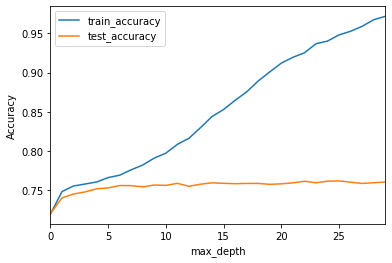

In [185]:
%%time
grid = list(range(1,31,1))
train_accuracy = list()
test_accuracy = list()
for i in grid:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=i,
                                      random_state=0)
    cv_results = cross_validate(rf_model, X_train, y_train, cv=3,
                            scoring= 'accuracy',
                            return_train_score=True)

    train_accuracy.append(np.mean(cv_results['train_score']))
    test_accuracy.append(np.mean(cv_results['test_score']))

test_res = pd.DataFrame([train_accuracy, test_accuracy], index = ['train_accuracy', 'test_accuracy']).T
test_res.set_index = grid
test_res.plot()
plt.ylabel('Accuracy')
plt.xlabel('max_depth')

#### Voting Classifier

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [225]:
from sklearn.model_selection import train_test_split
# X = df2.iloc[:,66:]
X = df2.iloc[:,1:]
# X = df2.iloc[:,1:66]
y = df2.iloc[:,0].map(lambda x: 1 if x == True else 0 )
# df2.loc[df2.LTOT_v2 == True, 'LTOT_v2'] = 1
# df2.loc[df2.LTOT_v2 == False, 'LTOT_v2'] = 0
# y = df2.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [226]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [231]:
log_clf = LogisticRegression(random_state=100)
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=15,
                                  random_state=100)
svm_clf = SVC(probability=True,random_state=100)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=100,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                            

In [232]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:", clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print("ROC_AUC:", clf.__class__.__name__, roc_auc_score(y_test, y_pred))
    

Accuracy: LogisticRegression 0.7303248310442555
ROC_AUC: LogisticRegression 0.730315740525636
Accuracy: RandomForestClassifier 0.7543056463919773
ROC_AUC: RandomForestClassifier 0.7542982679935256
Accuracy: SVC 0.7065620231087857
ROC_AUC: SVC 0.7065836815812196
Accuracy: VotingClassifier 0.7466753869631567
ROC_AUC: VotingClassifier 0.7466829792807875


In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier

clf1 = LogisticRegression(random_state=100)
clf2 = RandomForestClassifier(random_state=100)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='soft')

params = {'logisticregression__C': list(range(1,100,1)),
          'randomforestclassifier__n_estimators': list(range(20,200,5)),
          'randomforestclassifier__max_depth': list(range(1,31,1))}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

KeyboardInterrupt: 